# Intro to Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import mitdeeplearning as mdl
import matplotlib.pyplot as plt

In [2]:
# testing on 0-d tensor

music = tf.constant("kpop", tf.string)
depth = tf.constant(11.24325, tf.float16)

print("'music' is a {}-d Tensor".format(tf.rank(music).numpy()))
print("'depth' is a {}-d Tensor".format(tf.rank(depth).numpy()))

'music' is a 0-d Tensor
'depth' is a 0-d Tensor


In [3]:
# testing 1-d tensor
music = tf.constant(["kpop", "jrock"], tf.string)
depth = tf.constant([11.24325, 222.21412], tf.float16)

print("'music' is a {}-d Tensor with shape: ".format(tf.rank(music).numpy()), tf.shape(music))
print("'depth' is a {}-d Tensor with shape: ".format(tf.rank(depth).numpy()), tf.shape(depth))

'music' is a 1-d Tensor with shape:  tf.Tensor([2], shape=(1,), dtype=int32)
'depth' is a 1-d Tensor with shape:  tf.Tensor([2], shape=(1,), dtype=int32)


In [4]:
# testing 2-d tensor

matrix = tf.constant([[2,3],
                    [3,5]])

# test
assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [5]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3. 
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = tf.zeros([10, 256, 256, 3]) # [number_of_images, pixel_h, pixel_w, channels]

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

In [6]:
images.shape

TensorShape([10, 256, 256, 3])

In [7]:
row_vector = matrix[1]
column_vector = matrix[:,0]
scalar = matrix[1,1]

print("row vector: {}".format(row_vector.numpy()))
print("column vector: {}".format(column_vector.numpy()))
print("scalar: {}".format(scalar.numpy()))

row vector: [3 5]
column vector: [2 3]
scalar: 5


# Computation on Tensors

In [8]:
a = tf.constant(15)
b = tf.constant(61)

# addition
c1 = tf.add(a,b)
c2 = a + b
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


In [9]:
# constract simple computation

def func(a,b):
    c = tf.add(tf.multiply(a,b), tf.subtract(b, a))
    d = tf.multiply(tf.add(c, a), tf.multiply(b, c))
    return d


In [10]:
a, b = 45.9, 771.2

d_out = func(a, b)
print(d_out)

tf.Tensor(1007616660000.0, shape=(), dtype=float32)


# Neural Network in Tensorflow

In [11]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [23]:
class ourDenseLayer(tf.keras.layers.Layer):
    def __init__(self, n_output_nodes):
        super(ourDenseLayer, self).__init__()
        self.n_output_nodes = n_output_nodes
    
    def build(self, input_shape):
        d = int(input_shape[-1])
        self.weight = self.add_weight("weight", shape=[d, self.n_output_nodes])
        self.bias = self.add_weight("bias", shape=[1, self.n_output_nodes])

    def call(self, x):
        z = tf.add(tf.matmul(x, self.weight), self.bias)
        y = tf.sigmoid(z)
        return y

tf.random.set_seed(1)
layer = ourDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y) # only differ from 0.0000*

[[0.2697296 0.4574668 0.6653726]]


AssertionError: 
Arrays are not almost equal to 7 decimals
[FAIL] output is of incorrect value. expected [[0.2697296 0.4574668 0.6653726]] but got [[0.2697859  0.45750418 0.66536945]]
Mismatched elements: 3 / 3 (100%)
Max absolute difference: 5.6296587e-05
Max relative difference: 0.00020867
 x: array([[0.2697296, 0.4574668, 0.6653726]], dtype=float32)
 y: array([[0.2697859, 0.4575042, 0.6653695]], dtype=float32)

In [32]:
# defining NN using sequential API

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3
model = Sequential()


dense_layer = Dense(n_output_nodes, activation='sigmoid', use_bias=True)
model.add(dense_layer)

In [33]:
x_input = tf.constant([[1,2.]], shape=(1,2))

model_output = model.predict(x_input)
print(model_output)

1/1 [==============================] - 0s 39ms/step
[[0.9139073  0.32680833 0.83922404]]


In [35]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubClassModel(tf.keras.Model):
    def __init__(self, n_output_nodes):
        super(SubClassModel, self).__init__()
        self.dense_layer = Dense(n_output_nodes, activation='sigmoid', use_bias=True)

    def call(self, inputs):
        return self.dense_layer(inputs)

In [36]:
n_output_nodes = 3
model = SubClassModel(n_output_nodes)
x_input = tf.constant([[1,2.]], shape=(1,2))
print(model.call(x_input))

tf.Tensor([[0.25837278 0.49682617 0.449808  ]], shape=(1, 3), dtype=float32)


In [37]:
# define model using subclassing and specifying custom behavior

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class Identity(tf.keras.Model):
    def __init__(self, n_output_nodes):
        super(Identity, self).__init__()
        self.dense_layer = Dense(n_output_nodes, activation='sigmoid', use_bias=True)

    def call(self, inputs):
        x = self.dense_layer(inputs)
        y = tf.identity(x)
        return x, y

In [47]:
n_output_nodes = 3
model = Identity(n_output_nodes)
x_input = tf.constant([[1,2.]], shape=(1,2))

output = model.call(x_input)
out_activate = output[0][0]
out_identity = output[0][-1]

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: 0.07463503628969193; network identity output: 0.7021217346191406


# 3. Automatic Differentiation with Tensorflow

In [49]:
# let be y = x^2
# x = 3.0

x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x*x
    dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

In [50]:
# function minimization with differentiation and SGD

# x is a random value
x = tf.Variable(tf.random.normal([1]))
print("initializing x: {}".format(x.numpy()))

learning_rate = 1e-2
history = []

# target value
x_f = 4

initializing x: [1.7451856]


Text(0, 0.5, 'x value')

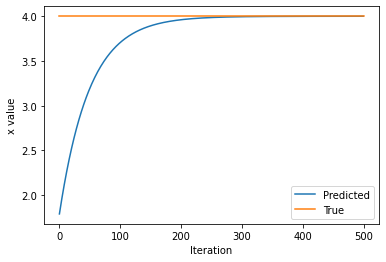

In [60]:
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss =  (x-x_f)**2

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')